In [1]:
import tensorflow as tf
 
 
 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 2 Logical GPUs


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
        keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8587 - accuracy: 0.7755 - val_loss: 0.2419 - val_accuracy: 0.9350
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9330 - val_loss: 0.1616 - val_accuracy: 0.9517
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9489 - val_loss: 0.1485 - val_accuracy: 0.9545
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.9571 - val_loss: 0.1257 - val_accuracy: 0.9618
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.1087 - val_accuracy: 0.9673
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9661 - val_loss: 0.1066 - val_accuracy: 0.9667
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9685 - val_loss: 0.0953 - val_accuracy: 0.9695
Epoch 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06948108226060867
Test accuracy: 0.9796000123023987


In [20]:
print(x_train.shape)
x_train[0].shape

(60000, 28, 28, 1)


(28, 28, 1)

In [99]:
index = 6

In [100]:
get_output = tf.keras.backend.function([model.layers[0].input],
                                       [model.layers[-3].output, model.layers[-1].output])
[conv_outputs, predictions] = get_output(x_train[index:index+1])
class_weights = model.layers[-1].get_weights()[0]

In [101]:
len(conv_outputs[0])

11

In [102]:
output = []
for num, idx in enumerate(np.argmax(predictions,axis=1)):
    cam = tf.matmul(np.expand_dims(class_weights[:,idx],axis = 0),
                    np.transpose(np.reshape(conv_outputs[num],(11*11,64))))
    cam = tf.keras.backend.eval(cam)
    output.append(cam)

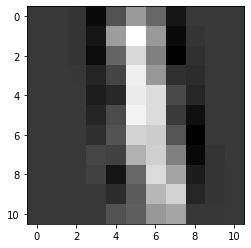

In [103]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(output[0][0], (11, 11)), cmap="gray")

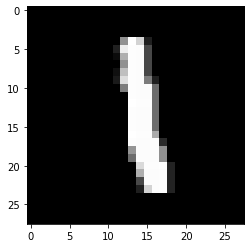

In [104]:
plt.imshow(np.reshape(x_train[index], (28, 28)), cmap="gray")

In [105]:
prediction = model.predict(x_train[index:index+1])
np.argmax(prediction)

1